In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np
from matplotlib_venn import venn2, venn3
import openpyxl
import seaborn as sns

In [15]:
#Read data

mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_WF = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data = data.loc[(data['#Feature'] >= 4)]
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum() 
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_WF = df_WF.append(data)  # appends all data

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_ninf = pd.DataFrame()
non_inf_patients=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    non_inf_patients.append(data['Peptide'])
    df_ninf = df_ninf.append(data)  # appends all data

mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_inf = pd.DataFrame()
inf_patients=[]
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    inf_patients.append(data['Peptide'])
    df_inf = df_inf.append(data)  # appends all data

df_ninf['count'] = 1
df_WF['count'] = 1
df_inf['count']=1


,Peptide,Accession,-10lgP,Mass,Length,ppm,m/z,RT,Area WF1,Fraction,...,#Feature WF1,count,Area WF2,#Feature WF2,Area WF 3,#Feature WF 3,Area WF4,#Feature WF4,Area WF5,#Feature WF5
0,AAGSDVDIDMAFILDSAETT,sp|P12111|CO6A3_HUMAN,61.04,2056.9146,20.0,4.6,1029.4692,109.31,892000.0,4,...,4.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AALLSPYSYSTTAVVTNPKE,sp|P02766|TTHY_HUMAN,85.56,2111.0786,20.0,2.0,1056.5487,75.48,70100000.0,3,...,8.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAMSTYTGIFTDQVLSVLKGEE,sp|P02655|APOC2_HUMAN,85.25,2375.1565,22.0,2.2,1188.5881,113.66,42600000.0,4,...,7.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AASQAALGL,sp|P02768|ALBU_HUMAN,49.02,800.4392,9.0,0.0,401.2269,37.79,18300000.0,3,...,4.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAWIDSVLA,sp|P00746|CFAD_HUMAN,47.32,944.4967,9.0,0.7,473.2560,106.09,701000.0,3,...,4.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,YPWTQRF,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,45.51,996.4818,7.0,1.6,499.2490,55.28,NaN,18,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,22500000.0,4.0
798,YQGAIRQIDDIDV,sp|P04114|APOB_HUMAN,51.08,1504.7521,13.0,5.5,753.3875,63.75,NaN,20,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1850000.0,4.0
799,YQKSTELLI,sp|Q71DI3|H32_HUMAN,41.45,1093.6019,9.0,3.0,547.8099,38.71,NaN,18,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1800000.0,4.0
800,YQKVVAGVANALAHKYH,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,58.64,1868.0056,17.0,1.8,623.6769,30.13,NaN,19,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,58100000.0,5.0


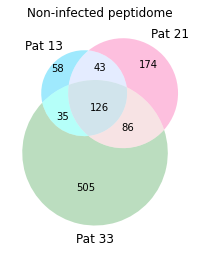

In [3]:
color=['#10cafa','#fc60ae','#55ab5f']
v=venn3([set(non_inf_patients[0]),set(non_inf_patients[1]),set(non_inf_patients[2])], set_labels=('Pat 13','Pat 21','Pat 33'), set_colors=color)
plt.title('Non-infected peptidome');

Text(0.5, 1.0, 'Infected peptidome')

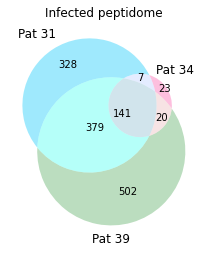

In [4]:
venn3([set(inf_patients[0]),set(inf_patients[1]),set(inf_patients[2])], set_labels=('Pat 31', 'Pat 34','Pat 39'), set_colors=color)
plt.title('Infected peptidome')

In [26]:
#Wound fluid
df_WF_all=pd.DataFrame()
df_WF_all['Peptide']=df_WF['Peptide']
df_WF = df_WF.groupby(['Accession','Peptide']).sum()
df_WF.reset_index(['Peptide'], inplace=True)
df_WF = df_WF[['Peptide', '#Feature', '#Feature WF1','#Feature WF2', '#Feature WF 3', '#Feature WF4','#Feature WF5','count']]
df_WF = df_WF.sort_values(['count','#Feature'], ascending=False)

#Non-infected patients
df_ninf_all=pd.DataFrame()
df_ninf_all['Peptide']=df_ninf['Peptide']

df_ninf = df_ninf.groupby(['Accession','Peptide']).sum()
df_ninf.reset_index(['Peptide'], inplace=True)
df_ninf = df_ninf[['Peptide','#Feature','#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33','count',]]
df_ninf = df_ninf.sort_values(['count','#Feature'], ascending=False)

#infected patients
df_inf_all=pd.DataFrame()
df_inf_all['Peptide']=df_inf['Peptide']

df_inf = df_inf.groupby(['Accession','Peptide']).sum()
df_inf.reset_index(['Peptide'], inplace=True)
df_inf = df_inf[['Peptide','#Feature','#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39','count',]]
df_inf = df_inf.sort_values(['count','#Feature'], ascending=False)

In [28]:
df_ninf_same=df_ninf.loc[(df_ninf['count']==3)]
df_WF_same=df_WF.loc[(df_WF['count']==5)]

df_WF_ninf=df_WF_same.append(df_ninf_same)
df_WF_ninf.reset_index()
df_WF_ninf=df_WF_ninf.groupby(['Accession','Peptide']).sum()
df_WF_ninf.sort_values(['count','#Feature'], ascending=False)
df_ninf_same


,Peptide,#Feature,#Feature Sample 13,#Feature Sample 21,#Feature Sample 33,count
Accession,,,,,,
sp|P02671|FIBA_HUMAN,MELERPGGNEITR,92,16.0,35.0,40.0,3
sp|P02671|FIBA_HUMAN,MELERPGGNEIT,62,16.0,32.0,13.0,3
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,ANALAHKYH,46,8.0,12.0,26.0,3
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,43,13.0,13.0,17.0,3
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,AGVANALAHKYH,41,11.0,12.0,18.0,3
...,...,...,...,...,...,...
sp|P69905|HBA_HUMAN,SLDKFLASVSTVLT,12,4.0,4.0,4.0,3
sp|P69905|HBA_HUMAN,SPADKTNVK,12,4.0,4.0,4.0,3
sp|P69905|HBA_HUMAN,VDPVNFK,12,4.0,4.0,4.0,3


Text(0.5, 1.0, 'WF intersection as part of total WF')

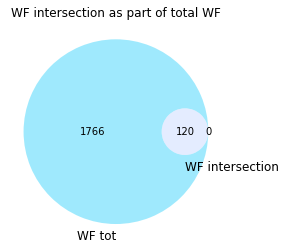

In [21]:
venn2([set(df_WF_all['Peptide']), set(df_WF_same['Peptide'])], set_labels = ('WF tot', 'WF intersection'), set_colors=color)
plt.title('WF intersection as part of total WF')

Text(0.5, 1.0, 'WF vs non-infected overlap')

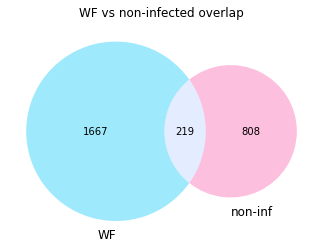

In [8]:
venn2([set(df_WF['Peptide']), set(df_ninf['Peptide'])], set_labels = ('WF', 'non-inf'), set_colors=color)
plt.title('WF vs non-infected overlap')

In [9]:
df_inf_same=df_inf.loc[(df_inf['count']==3)]

df_ninf_inf=df_ninf_same.append(df_inf_same)
df_ninf_inf.reset_index()
df_ninf_inf=df_ninf_inf.groupby(['Accession','Peptide']).sum()
df_ninf_inf=df_ninf_inf.sort_values(['count','#Feature'], ascending=False)
df_ninf_inf['Difference (ninf-inf)']=((df_ninf_inf['#Feature Sample 13']+df_ninf_inf['#Feature Sample 21']+df_ninf_inf['#Feature Sample 33'])/3)-((df_ninf_inf['#Feature Sample 31']+df_ninf_inf['#Feature Sample 34']+df_ninf_inf['#Feature Sample 39'])/3)
df_ninf_inf=df_ninf_inf.sort_values(['Difference (ninf-inf)'], ascending=True)
df_ninf_inf.reset_index(inplace=True)
df_ninf_inf.sort_values(['Difference (ninf-inf)'])
df_ninf_inf['std ninf']=df_ninf_inf[['#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33']].std(axis = 1, skipna = True) 
df_ninf_inf['std inf']=df_ninf_inf[['#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39']].std(axis = 1, skipna = True)
df_ninf_inf[0:30]

,Accession,Peptide,#Feature,#Feature Sample 13,#Feature Sample 21,#Feature Sample 33,count,#Feature Sample 31,#Feature Sample 34,#Feature Sample 39,Difference (ninf-inf),std ninf,std inf
0,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,AGVANALAHKYH,150,11.0,12.0,18.0,6,37.0,12.0,60.0,-22.666667,3.785939,24.006943
1,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,152,13.0,13.0,17.0,6,42.0,12.0,55.0,-22.000000,2.309401,22.052967
2,sp|P68871|HBB_HUMAN,SDGLAHLDNLKGTFA,56,0.0,0.0,0.0,3,22.0,6.0,28.0,-18.666667,0.000000,11.372481
3,sp|P68871|HBB_HUMAN,VHLTPEEKSAV,102,8.0,8.0,8.0,6,28.0,14.0,36.0,-18.000000,0.000000,11.135529
4,sp|P69905|HBA_HUMAN,AHVDDMPNALSAL,54,0.0,0.0,0.0,3,22.0,13.0,19.0,-18.000000,0.000000,4.582576
5,sp|P68871|HBB_HUMAN,DGLAHLDNLKGTFA,53,0.0,0.0,0.0,3,21.0,5.0,27.0,-17.666667,0.000000,11.372481
6,sp|P69905|HBA_HUMAN,STVLTSKYR,102,8.0,7.0,10.0,6,21.0,15.0,41.0,-17.333333,1.527525,13.613719
7,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,ANALAHKYH,140,8.0,12.0,26.0,6,33.0,9.0,52.0,-16.000000,9.451631,21.548395
8,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,SDGLAHLDNLKGTF,45,0.0,0.0,0.0,3,23.0,6.0,16.0,-15.000000,0.000000,8.544004
9,sp|P69905|HBA_HUMAN,SDLHAHKLRVDPV,45,0.0,0.0,0.0,3,25.0,6.0,14.0,-15.000000,0.000000,9.539392


,Accession,_merge,Peptide
0,sp|P68871|HBB_HUMAN,left_only,EVGGEALGRLLV
1,sp|P02768|ALBU_HUMAN,left_only,ASQAALGL
2,sp|P69905|HBA_HUMAN,left_only,TNAVAHVDDMPNALSAL
3,sp|P62805|H4_HUMAN,left_only,FLENVIRDAVTY
4,sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,left_only,HLDNLKGT
5,sp|P69905|HBA_HUMAN,left_only,GKVGAHAGEYGAEALER
6,sp|P69905|HBA_HUMAN,left_only,VADALTNAV
7,sp|P02652|APOA2_HUMAN,left_only,SPELQAEAK
8,sp|P68871|HBB_HUMAN,left_only,HLDNLKGTFA
9,sp|P69905|HBA_HUMAN,left_only,VDDMPNALSAL


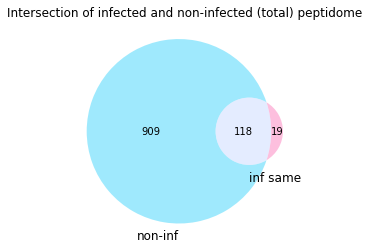

In [29]:
venn2([set(df_ninf['Peptide']), set(df_inf_same['Peptide'])], set_labels = ('non-inf', 'inf same'), set_colors=color)
plt.title('Intersection of infected and non-infected (total) peptidome')
biomarker=df_inf_same.merge(df_ninf, on=['Peptide','Accession'], indicator= True, how='outer')
biomarker=biomarker[['_merge','Peptide']].sort_values('_merge')
biomarker=biomarker.loc[(biomarker['_merge']=='left_only')]
biomarker.reset_index(inplace=True)
biomarker

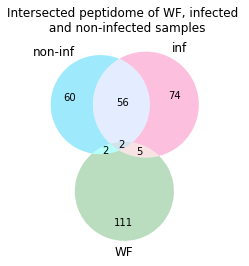

In [11]:
v=venn3([set(df_ninf_same['Peptide']), set(df_inf_same['Peptide']), set(df_WF_same['Peptide'])], set_labels = ('non-inf', 'inf', 'WF'), set_colors=color)
plt.title('Intersected peptidome of WF, infected \n and non-infected samples')
plt.savefig(fname='test',dpi=100)

# To heatmap


In [12]:
mapp='peptide_sample_inf'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_inf = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_inf = df_inf.append(data)  # appends all data


df_inf['count']=1
df_inf= df_inf.groupby(['Peptide'], as_index=False).sum()
df_inf = df_inf[['Peptide','#Feature','#Feature Sample 31', '#Feature Sample 34', '#Feature Sample 39','count',]]
df_inf = df_inf.sort_values(['Peptide'])


mapp='WF'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_WF = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_WF = df_WF.append(data)  # appends all data


df_WF['count']=1
df_WF= df_WF.groupby(['Peptide'], as_index=False).sum()
df_WF = df_WF[['Peptide', '#Feature', '#Feature WF1','#Feature WF2', '#Feature WF 3', '#Feature WF4','#Feature WF5','count']]
df_WF = df_WF.sort_values(['Peptide'])
df_WF

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df_ninf = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.loc[(data['#Feature'] >= 4)] 
    data = data.groupby(['Peptide'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    df_ninf = df_ninf.append(data)  # appends all data


df_ninf['count']=1
df_ninf= df_ninf.groupby(['Peptide'], as_index=False).sum()
df_ninf = df_ninf[['Peptide','#Feature','#Feature Sample 13', '#Feature Sample 21', '#Feature Sample 33','count',]]
df_ninf = df_ninf.sort_values(['Peptide'])


In [13]:
heatmap_inf=pd.read_excel('heatmap.xlsx',sheet_name='inf')
heatmap_ninf=pd.read_excel('heatmap.xlsx',sheet_name='ninf')
heatmap_WF=pd.read_excel('heatmap.xlsx',sheet_name='WF')

df_inf['avg feat']=df_inf['#Feature']/df_inf['count']
df_ninf['avg feat']=df_ninf['#Feature']/df_ninf['count']
df_WF['avg feat']=df_WF['#Feature']/df_WF['count']

inf=df_inf['avg feat']*heatmap_inf['Deep-AmPEP30']
ninf=df_ninf['avg feat']*heatmap_ninf['Deep-AmPEP30']
WF=df_WF['avg feat']*heatmap_WF['Deep-AmPEP30']
inf=inf.sort_values(ascending=False)
ninf=ninf.sort_values(ascending=False)
WF=WF.sort_values(ascending=False)
inf.dropna
WF.dropna
ninf.dropna


<bound method Series.dropna of 32     12.981931
339    12.768635
73     12.404161
388    12.250035
35     12.192730
         ...    
15      0.008134
841     0.007656
460     0.006792
584     0.006155
985    -5.000000
Length: 1036, dtype: float64>

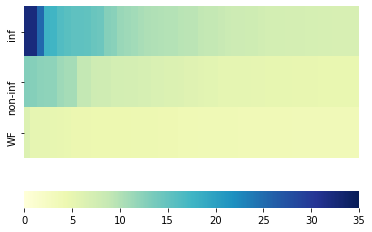

In [14]:
inf=inf[0:50]
ninf=ninf[0:50]
WF=WF[0:50]
ytick=['inf','non-inf','WF']
ax = sns.heatmap([inf,ninf, WF] ,vmin=0, vmax=35,cmap="YlGnBu", yticklabels=ytick, xticklabels=False,
                 cbar_kws={"orientation": "horizontal"},)